<a href="https://colab.research.google.com/github/wojtekk23/AudioLIMEExperiments/blob/main/AudioLIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AudioLIME experiments

In [1]:
!git clone https://github.com/CPJKU/audioLIME.git  # HTTPS
!apt install ffmpeg
!apt install libsndfile1

fatal: destination path 'audioLIME' already exists and is not an empty directory.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsndfile1 is already the newest version (1.0.28-4ubuntu0.18.04.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [2]:
!cd audioLIME && python setup.py install

/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  warnings.warn(
running install
running bdist_egg
running egg_info
writing audioLIME.egg-info/PKG-INFO
writing dependency_links to audioLIME.egg-info/dependency_links.txt
writing requirements to audioLIME.egg-info/requires.txt
writing top-level names to audioLIME.egg-info/top_level.txt
writing manifest file 'audioLIME.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/audioLIME
copying build/lib/audioLIME/__init__.py -> build/bdist.linux-x86_64/egg/audioLIME
copying build/lib/audioLIME/factorization_base.py -> build/bdist.linux-x86_64/egg/audioLIME
copying build/lib/audioLIME/factorization_slime.py -> build/bdist.linux-x86_64/egg/au

In [3]:
!pip install spleeter==2.0.2 mirdata torchaudio_augmentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**You need to restart the environment NOW**

## Spleeter test

In [4]:
!wget https://github.com/deezer/spleeter/raw/master/audio_example.mp3

--2022-12-09 20:31:37--  https://github.com/deezer/spleeter/raw/master/audio_example.mp3
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/deezer/spleeter/master/audio_example.mp3 [following]
--2022-12-09 20:31:37--  https://raw.githubusercontent.com/deezer/spleeter/master/audio_example.mp3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262867 (257K) [audio/mpeg]
Saving to: ‘audio_example.mp3’

audio_example.mp3   100%[===================>] 256.71K  --.-KB/s    in 0.03s   

2022-12-09 20:31:38 (8.56 MB/s) - ‘audio_example.mp3’ saved [262867/262867]



In [5]:
!spleeter separate -p spleeter:2stems -o output -i audio_example.mp3

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz
INFO:spleeter:Validating archive checksum
INFO:spleeter:Extracting downloaded 2stems archive
INFO:spleeter:2stems model file(s) extracted
INFO:spleeter:File output/audio_example/vocals.wav written succesfully
INFO:spleeter:File output/audio_example/accompaniment.wav written succesfully


In [6]:
from spleeter.separator import Separator
import numpy as np
import librosa

separator = Separator('spleeter:2stems')
audio, sr = librosa.load('audio_example.mp3')
result = separator.separate(np.array(audio).reshape((-1, 1)))

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [7]:
print(audio)
print(result['vocals'].shape)

[ 5.4545104e-05  6.9404166e-05 -1.4486626e-05 ... -3.9087441e-05
 -2.3098710e-05 -1.8062412e-05]
(239916, 2)


In [8]:
from IPython.display import Audio, display

display(Audio(audio, autoplay=False, rate=sr))

In [9]:
display(Audio(result['vocals'].T, autoplay=False, rate=sr))
display(Audio(result['accompaniment'].T, autoplay=False, rate=sr))

## Gtzan dataset

In [10]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
!cp /content/gdrive/MyDrive/gtzan.zip gtzan.zip

In [12]:
!unzip gtzan.zip
!wget https://raw.githubusercontent.com/coreyker/dnn-mgr/master/gtzan/train_filtered.txt
!wget https://raw.githubusercontent.com/coreyker/dnn-mgr/master/gtzan/valid_filtered.txt
!wget https://raw.githubusercontent.com/coreyker/dnn-mgr/master/gtzan/test_filtered.txt

Archive:  gtzan.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wav  
  inflating: Data/genres_origin

In [13]:
!cp train_filtered.txt Data/genres_original
!cp valid_filtered.txt Data/genres_original
!cp test_filtered.txt Data/genres_original

In [14]:
import os
import random
import torch
import numpy as np
import soundfile as sf
from torch.utils import data
from torchaudio_augmentations import (
    RandomResizedCrop,
    RandomApply,
    PolarityInversion,
    Noise,
    Gain,
    HighLowPass,
    Delay,
    PitchShift,
    Reverb,
    Compose,
)


GTZAN_GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
CORRUPT_FILES = ['jazz/jazz.00054.wav']


class GTZANDataset(data.Dataset):
    def __init__(self, data_path, split, num_samples, num_chunks, is_augmentation):
        self.data_path =  data_path if data_path else ''
        self.split = split
        self.num_samples = num_samples
        self.num_chunks = num_chunks
        self.is_augmentation = is_augmentation
        self.genres = GTZAN_GENRES
        self._get_song_list()
        if is_augmentation:
            self._get_augmentations()

    def _get_song_list(self):
        list_filename = os.path.join(self.data_path, f'{self.split}_filtered.txt')
        with open(list_filename) as f:
            lines = f.readlines()
        self.song_list = [line.strip() for line in lines if line.strip() not in CORRUPT_FILES]

    def _get_augmentations(self):
        transforms = [
            RandomResizedCrop(n_samples=self.num_samples),
            RandomApply([PolarityInversion()], p=0.8),
            RandomApply([Noise(min_snr=0.3, max_snr=0.5)], p=0.3),
            RandomApply([Gain()], p=0.2),
            RandomApply([HighLowPass(sample_rate=22050)], p=0.8),
            RandomApply([Delay(sample_rate=22050)], p=0.5),
            RandomApply([PitchShift(n_samples=self.num_samples, sample_rate=22050)], p=0.4),
            RandomApply([Reverb(sample_rate=22050)], p=0.3),
        ]
        self.augmentation = Compose(transforms=transforms)

    def _adjust_audio_length(self, wav):
        if self.split == 'train':
            random_index = random.randint(0, len(wav) - self.num_samples - 1)
            wav = wav[random_index : random_index + self.num_samples]
        else:
            hop = (len(wav) - self.num_samples) // self.num_chunks
            wav = np.array([wav[i * hop : i * hop + self.num_samples] for i in range(self.num_chunks)])
        return wav

    def __getitem__(self, index):
        line = self.song_list[index]

        # get genre
        genre_name = line.split('/')[0]
        genre_index = self.genres.index(genre_name)

        # get audio
        audio_filename = os.path.join(self.data_path, line)
        wav, fs = sf.read(audio_filename)

        # adjust audio length
        wav = self._adjust_audio_length(wav).astype('float32')

        # data augmentation
        if self.is_augmentation:
            wav = self.augmentation(torch.from_numpy(wav).unsqueeze(0)).squeeze(0).numpy()

        return wav, genre_index

    def __len__(self):
        return len(self.song_list)

def get_dataloader(data_path=None, 
                   split='train', 
                   num_samples=22050 * 29, 
                   num_chunks=1, 
                   batch_size=16, 
                   num_workers=0, 
                   is_augmentation=False):
    is_shuffle = True if (split == 'train') else False
    batch_size = batch_size if (split == 'train') else (batch_size // num_chunks)
    data_loader = data.DataLoader(dataset=GTZANDataset(data_path, 
                                                       split, 
                                                       num_samples, 
                                                       num_chunks, 
                                                       is_augmentation),
                                  batch_size=batch_size,
                                  shuffle=is_shuffle,
                                  drop_last=False,
                                  num_workers=num_workers)
    return data_loader

In [15]:
DATA_PATH = '/content/Data/genres_original'
train_loader = get_dataloader(data_path=DATA_PATH, split='train', is_augmentation=True)
iter_train_loader = iter(train_loader)
train_wav, train_genre = next(iter_train_loader)

valid_loader = get_dataloader(data_path=DATA_PATH, split='valid')
test_loader = get_dataloader(data_path=DATA_PATH, split='test')
iter_test_loader = iter(test_loader)
test_wav, test_genre = next(iter_test_loader)
print('training data shape: %s' % str(train_wav.shape))
print('validation/test data shape: %s' % str(test_wav.shape))
print(train_genre)

training data shape: torch.Size([16, 639450])
validation/test data shape: torch.Size([16, 1, 639450])
tensor([8, 8, 8, 6, 9, 5, 0, 2, 9, 7, 8, 6, 0, 1, 1, 0])


## Basic CNN genre classifier

In [16]:
from torch import nn

class Conv_2d(nn.Module):
  def __init__(self, input_channels, output_channels, shape=3, pooling=2, dropout=0.1):
    super().__init__()
    self.conv = nn.Conv2d(input_channels, output_channels, shape, padding=shape // 2)
    self.bn = nn.BatchNorm2d(output_channels)
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(pooling)
    self.dropout = nn.Dropout(dropout)
  
  def forward(self, wav):
    out = self.conv(wav)
    out = self.bn(out)
    out = self.relu(out)
    out = self.maxpool(out)
    out = self.dropout(out)
    return out

In [17]:
import torchaudio

class CNN(nn.Module):
  def __init__(self, num_channels=16,
               sample_rate=22050,
               n_fft=1024,
               f_min=0.0,
               f_max=11025.0,
               n_mels=128,
               n_classes=10):
    super(CNN, self).__init__()

    self.melspec = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate, 
                                                        n_fft=n_fft,
                                                        f_min=f_min,
                                                        f_max=f_max,
                                                        n_mels=n_mels)
    self.amp_to_db = torchaudio.transforms.AmplitudeToDB()
    self.input_bn = nn.BatchNorm2d(1)

    self.convs = nn.Sequential(
        Conv_2d(1, num_channels, pooling=(2, 3)),
        Conv_2d(num_channels, num_channels, pooling=(3, 4)),
        Conv_2d(num_channels, num_channels * 2, pooling=(2, 5)),
        Conv_2d(num_channels * 2, num_channels * 2, pooling=(3, 3)),
        Conv_2d(num_channels * 2, num_channels * 4, pooling=(3, 4))
    )
    self.dense1 = nn.Linear(num_channels * 4, num_channels * 4)
    self.dense_bn = nn.BatchNorm1d(num_channels * 4)
    self.dropout = nn.Dropout(0.5)
    self.dense2 = nn.Linear(num_channels * 4, n_classes)
    self.relu = nn.ReLU()

  def forward(self, wav):
    out = self.melspec(wav)
    out = self.amp_to_db(out)

    out = out.unsqueeze(1)
    out = self.input_bn(out)

    out = self.convs(out)
    # (bs, n_channels, 1, 1) -> (bs, n_channels)
    out = out.reshape(len(out), -1)

    out = self.dense1(out)
    out = self.dense_bn(out)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.dense2(out)

    return out

### Training

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cnn = CNN().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
valid_losses = []
num_epochs = 30

for epoch in range(num_epochs):
    losses = []

    # Train
    cnn.train()
    for (wav, genre_index) in train_loader:
        wav = wav.to(device)
        genre_index = genre_index.to(device)

        # Forward
        out = cnn(wav)
        loss = loss_function(out, genre_index)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print('Epoch: [%d/%d], Train loss: %.4f' % (epoch+1, num_epochs, np.mean(losses)))

    # Validation
    cnn.eval()
    y_true = []
    y_pred = []
    losses = []
    for wav, genre_index in valid_loader:
        wav = wav.to(device)
        genre_index = genre_index.to(device)

        # reshape and aggregate chunk-level predictions
        b, c, t = wav.size()
        logits = cnn(wav.view(-1, t))
        logits = logits.view(b, c, -1).mean(dim=1)
        loss = loss_function(logits, genre_index)
        losses.append(loss.item())
        _, pred = torch.max(logits.data, 1)

        # append labels and predictions
        y_true.extend(genre_index.tolist())
        y_pred.extend(pred.tolist())
    accuracy = accuracy_score(y_true, y_pred)
    valid_loss = np.mean(losses)
    print('Epoch: [%d/%d], Valid loss: %.4f, Valid accuracy: %.4f' % (epoch+1, num_epochs, valid_loss, accuracy))

    # Save model
    valid_losses.append(valid_loss.item())
    if np.argmin(valid_losses) == epoch:
        print('Saving the best model at %d epochs!' % epoch)
        torch.save(cnn.state_dict(), 'best_model.ckpt')

Epoch: [1/30], Train loss: 2.3840
Epoch: [1/30], Valid loss: 2.2943, Valid accuracy: 0.1168
Saving the best model at 0 epochs!
Epoch: [2/30], Train loss: 2.3540
Epoch: [2/30], Valid loss: 2.2304, Valid accuracy: 0.1269
Saving the best model at 1 epochs!
Epoch: [3/30], Train loss: 2.2405
Epoch: [3/30], Valid loss: 2.1002, Valid accuracy: 0.2487
Saving the best model at 2 epochs!
Epoch: [4/30], Train loss: 2.1521
Epoch: [4/30], Valid loss: 2.0057, Valid accuracy: 0.2944
Saving the best model at 3 epochs!
Epoch: [5/30], Train loss: 2.1239
Epoch: [5/30], Valid loss: 2.0212, Valid accuracy: 0.2538
Epoch: [6/30], Train loss: 2.0274
Epoch: [6/30], Valid loss: 1.9893, Valid accuracy: 0.3046
Saving the best model at 5 epochs!
Epoch: [7/30], Train loss: 1.9893
Epoch: [7/30], Valid loss: 2.2176, Valid accuracy: 0.1574
Epoch: [8/30], Train loss: 1.9656
Epoch: [8/30], Valid loss: 1.8189, Valid accuracy: 0.3299
Saving the best model at 7 epochs!
Epoch: [9/30], Train loss: 1.9469
Epoch: [9/30], Valid

In [ ]:
!cp best_model.ckpt gdrive/MyDrive/best_model_cnn_gtzan.ckpt

### Evaluation

In [20]:
!cp gdrive/MyDrive/best_model_cnn_gtzan.ckpt best_model.ckpt

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cnn = CNN().to(device)
state_dict = torch.load('best_model.ckpt')
cnn.load_state_dict(state_dict)

cnn.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for wav, genre_index in test_loader:
        wav = wav.to(device)
        genre_index = genre_index.to(device)

        # reshape and aggregate chunk-level predictions
        b, c, t = wav.size()
        logits = cnn(wav.view(-1, t))
        logits = logits.view(b, c, -1).mean(dim=1)
        _, pred = torch.max(logits.data, 1)

        # append labels and predictions
        y_true.extend(genre_index.tolist())
        y_pred.extend(pred.tolist())

Accuracy: 0.4655


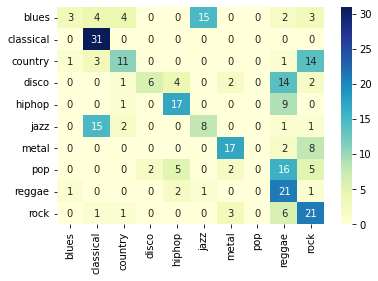

In [22]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, xticklabels=GTZAN_GENRES, yticklabels=GTZAN_GENRES, cmap='YlGnBu')
print('Accuracy: %.4f' % accuracy)

## AudioLIME

In [ ]:
audios, labels = next(iter(test_loader))